# <center> 「EfficientNetV2B1」ACC:100% Classification📈 </center>

## <center> Dataset Garbage </center>

## <center> Dataset original Garbage 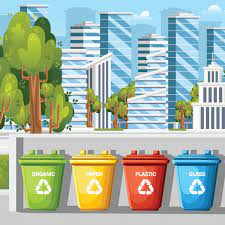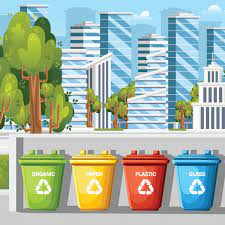 </center>

# Table of Contents
<a id="toc"></a>
- [1. Import Libraries](#1)
- [2. Read Dataset](#2)
- [3. Visualization](#3)
- [4. Split Dataset](#4)
- [5. Modeling](#5)  
- [6. Confusion_matrix](#6)  
- [7. Accuracy](#7)  

<a id="1"></a>
# **<center><span style="color:#005dc4;">Import Libraries</span></center>**

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras 
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob 
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'cv2'

<a id="2"></a>
# **<center><span style="color:#005dc4;">Read Dataset</span></center>**

In [ ]:
#Create Files_Name
image_data= '/kaggle/input/garbage-classification/garbage_classification'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,metal
1,white-glass
2,biological
3,paper
4,brown-glass
5,battery
6,trash
7,cardboard
8,shoes
9,clothes


In [ ]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,/kaggle/input/garbage-classification/garbage_c...,plastic
1,/kaggle/input/garbage-classification/garbage_c...,clothes
2,/kaggle/input/garbage-classification/garbage_c...,clothes
3,/kaggle/input/garbage-classification/garbage_c...,shoes
4,/kaggle/input/garbage-classification/garbage_c...,clothes
...,...,...
15510,/kaggle/input/garbage-classification/garbage_c...,clothes
15511,/kaggle/input/garbage-classification/garbage_c...,clothes
15512,/kaggle/input/garbage-classification/garbage_c...,clothes
15513,/kaggle/input/garbage-classification/garbage_c...,paper


<a id="3"></a>
# **<center><span style="color:#005dc4;">Visualization</span></center>**

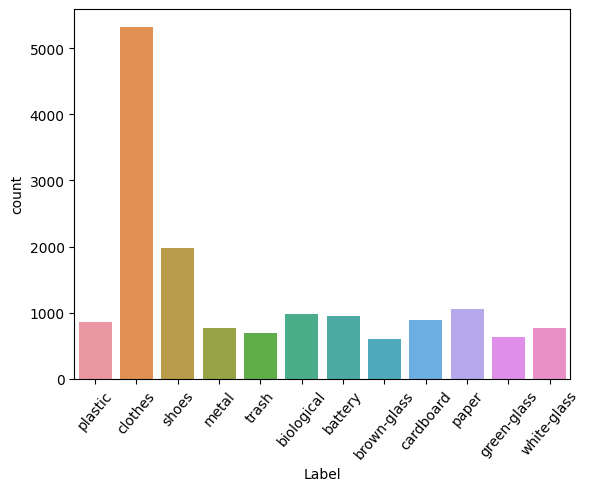

In [ ]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 50);

<a id="4"></a>
# **<center><span style="color:#005dc4;">Split Dataset</span></center>**

In [ ]:
train_data_dir =image_data
batch_size = 128                           
target_size = (224,224)
validation_split = 0.2

In [ ]:

train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=50,                                                         
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=100,                                                         
    image_size=target_size,
    batch_size=batch_size,
)

Found 15515 files belonging to 12 classes.
Using 12412 files for training.
Found 15515 files belonging to 12 classes.
Using 3103 files for validation.


In [ ]:
class_names = train.class_names
class_names

['battery',
 'biological',
 'brown-glass',
 'cardboard',
 'clothes',
 'green-glass',
 'metal',
 'paper',
 'plastic',
 'shoes',
 'trash',
 'white-glass']

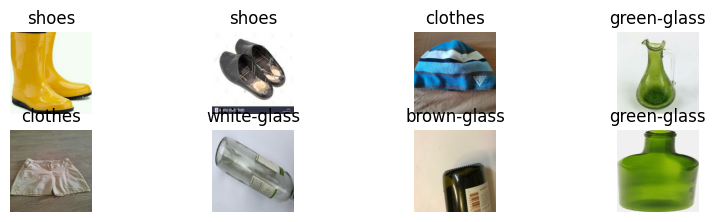

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

<a id="5"></a>
# **<center><span style="color:#005dc4;">Modeling</span></center>**

In [ ]:
base_model = tf.keras.applications.EfficientNetV2B1(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten()) 
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(12,activation=tf.nn.softmax))     #12 classes
keras_model.summary()

28456008/28456008 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b1 (Function  (None, 7, 7, 1280)       6931124   
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dropout (Dropout)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 12)                752652    
                                                                 
Total params: 7,683,776
Trainable params: 752,652
Non-trainable params: 6,931,124
_________________________________________________________________


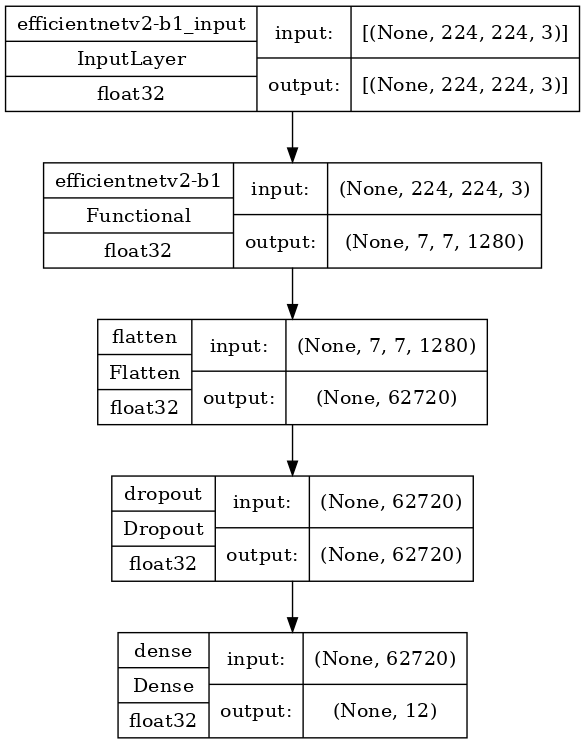

In [ ]:
tf.keras.utils.plot_model(keras_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=100)

In [ ]:
checkpoint =ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [ ]:
early_stopping =EarlyStopping(patience=10, restore_best_weights=True)    

In [ ]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:

hist=keras_model.fit(train,epochs=10,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/10


2024-03-11 02:08:26.266660: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnetv2-b1/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


97/97 [==============================] - 49s 368ms/step - loss: 0.5828 - accuracy: 0.8969 - val_loss: 0.1861 - val_accuracy: 0.9675
Epoch 2/10
97/97 [==============================] - 31s 311ms/step - loss: 0.1583 - accuracy: 0.9704 - val_loss: 0.0990 - val_accuracy: 0.9807
Epoch 3/10
97/97 [==============================] - 31s 314ms/step - loss: 0.1094 - accuracy: 0.9790 - val_loss: 0.0926 - val_accuracy: 0.9878
Epoch 4/10
97/97 [==============================] - 31s 309ms/step - loss: 0.1126 - accuracy: 0.9813 - val_loss: 0.0937 - val_accuracy: 0.9884
Epoch 5/10
97/97 [==============================] - 32s 319ms/step - loss: 0.0827 - accuracy: 0.9840 - val_loss: 0.0868 - val_accuracy: 0.9887
Epoch 6/10
97/97 [==============================] - 31s 311ms/step - loss: 0.0631 - accuracy: 0.9876 - val_loss: 0.1296 - val_accuracy: 0.9881
Epoch 7/10
97/97 [==============================] - 31s 310ms/step - loss: 0.0780 - accuracy: 0.9877 - val_loss: 0.1219 - val_accuracy: 0.9871
Epoch 8/10

In [ ]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

25/25 [==============================] - 6s 216ms/step - loss: 0.1046 - accuracy: 0.9907
Test Loss = 0.10455130785703659
Test Accuracy = 0.9906542301177979


In [ ]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,0.582782,0.896874,0.186089,0.967451
1,0.158342,0.970351,0.099026,0.980664
2,0.109382,0.978972,0.092556,0.987754
3,0.112579,0.981308,0.093724,0.988398
4,0.082697,0.983967,0.086782,0.988721
5,0.063123,0.987593,0.129607,0.988076
6,0.078000,0.987673,0.121891,0.987109
7,0.070406,0.988318,0.152598,0.985820
8,0.071043,0.989123,0.112781,0.988076
9,0.073391,0.989365,0.104551,0.990654


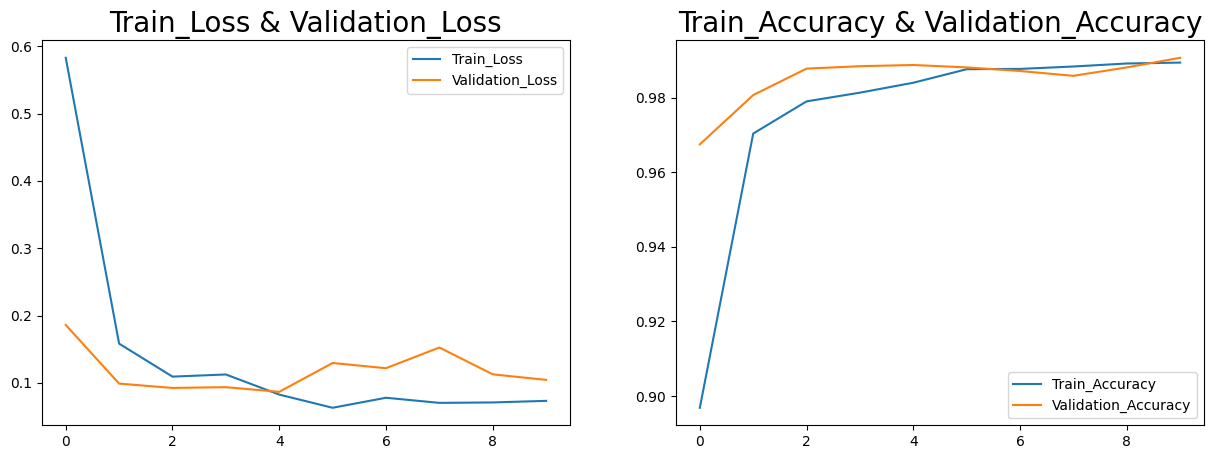

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [ ]:
X_val,y_val,y_pred=[],[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=keras_model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

97/97 [==============================] - 8s 56ms/step


,Actual,Prediction
0,10,10
1,4,4
2,1,1
3,4,4
4,11,11
...,...,...
3098,10,10
3099,3,3
3100,4,4
3101,4,4


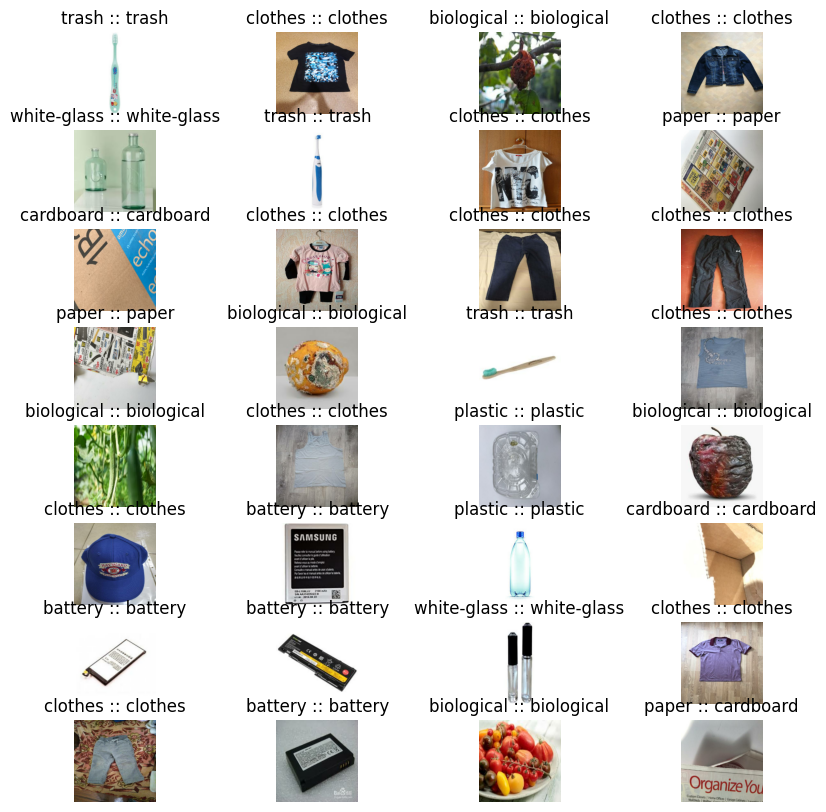

In [ ]:
plt.figure(figsize=(10,10))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i]]}')
    plt.axis("off")

<a id="6"></a>
# **<center><span style="color:#005dc4;">Confusion_matrix</span></center>**

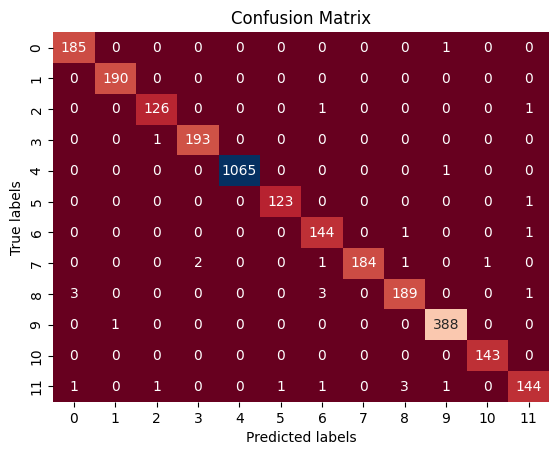

array([[ 185,    0,    0,    0,    0,    0,    0,    0,    0,    1,    0,
           0],
       [   0,  190,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,  126,    0,    0,    0,    1,    0,    0,    0,    0,
           1],
       [   0,    0,    1,  193,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,    0, 1065,    0,    0,    0,    0,    1,    0,
           0],
       [   0,    0,    0,    0,    0,  123,    0,    0,    0,    0,    0,
           1],
       [   0,    0,    0,    0,    0,    0,  144,    0,    1,    0,    0,
           1],
       [   0,    0,    0,    2,    0,    0,    1,  184,    1,    0,    1,
           0],
       [   3,    0,    0,    0,    0,    0,    3,    0,  189,    0,    0,
           1],
       [   0,    1,    0,    0,    0,    0,    0,    0,    0,  388,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  143,
           0],
       [   1,    0,  

In [ ]:
ax= plt.subplot()
CM = confusion_matrix(y_val,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
plt.show()
CM

<a id="7"></a>
# **<center><span style="color:#005dc4;">Accuracy</span></center>**

In [ ]:
Acc = accuracy_score(y_val,y_pred)
print("accuracy is: {0:.4f}%".format(Acc * 100))

accuracy is: 99.0654%
